# Leukocytes - Model Evaluation

###  Load the test subset and evaluate the final model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -U fastai

from fastai.vision.all import *
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = Path('/content/drive/MyDrive/ColabNotebooks/dataframes/leukocytes_splits.csv')
df = pd.read_csv(csv_path)

print("Full dataframe sizes by set:")
print(df['set'].value_counts())

df_test = df[df['set'] == 'test'].copy()
print("\nTest set size:", len(df_test))
display(df_test.head())

Full dataframe sizes by set:
set
train    1750
valid     375
test      375
Name: count, dtype: int64

Test set size: 375


,filepath,label,set
2125,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_164571.jpg,eosinophil,test
2126,/content/drive/MyDrive/CVData/dataset_leukocytes/basophil/BA_915476.jpg,basophil,test
2127,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_510096.jpg,eosinophil,test
2128,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_7698.jpg,eosinophil,test
2129,/content/drive/MyDrive/CVData/dataset_leukocytes/lymphocyte/LY_154914.jpg,lymphocyte,test


In [ ]:
model_path = Path('/content/drive/MyDrive/ColabNotebooks/models/model.pkl')
learn = load_learner(model_path)
learn

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
dls = learn.dls

# Build a test_dl from df_test (includes labels when with_labels=True)
test_dl = dls.test_dl(df_test, with_labels=True)

preds_test, targs_test = learn.get_preds(dl=test_dl)

print("preds:", type(preds_test), preds_test.shape)
print("targs:", type(targs_test), targs_test.shape)

acc_test = accuracy(preds_test, targs_test).item()
print(f"\nTest Accuracy from exported model: {acc_test*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

preds: <class 'torch.Tensor'> torch.Size([375, 5])
targs: <class 'torch.Tensor'> torch.Size([375])

Test Accuracy from exported model: 100.00%


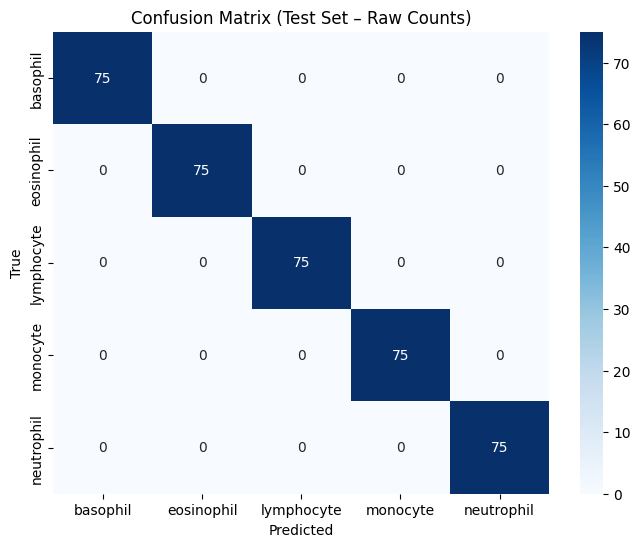

In [ ]:
vocab = list(learn.dls.vocab)
pred_labels_test = preds_test.argmax(dim=1)

cm_raw = confusion_matrix(targs_test, pred_labels_test)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_raw,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=vocab,
    yticklabels=vocab
)
plt.title("Confusion Matrix (Test Set – Raw Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

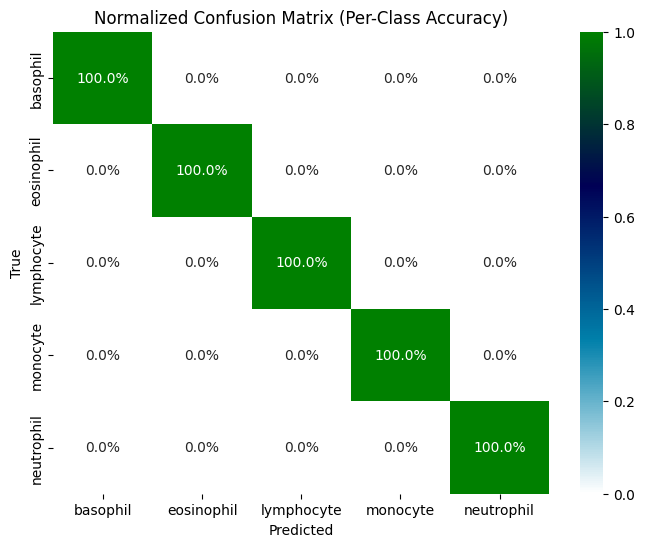

In [ ]:
cm_norm = confusion_matrix(targs_test, pred_labels_test, normalize='true')

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm,
    annot=True,
    cmap="ocean_r",
    fmt=".1%",
    xticklabels=vocab,
    yticklabels=vocab
)
plt.title("Normalized Confusion Matrix (Per-Class Accuracy)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print("Classification report (test set):\n")
print(classification_report(targs_test.cpu(), pred_labels_test.cpu(), target_names=vocab))


Classification report (test set):

              precision    recall  f1-score   support

    basophil       1.00      1.00      1.00        75
  eosinophil       1.00      1.00      1.00        75
  lymphocyte       1.00      1.00      1.00        75
    monocyte       1.00      1.00      1.00        75
  neutrophil       1.00      1.00      1.00        75

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



In [ ]:
test_files = df_test['filepath'].tolist()
test_labels = df_test['label'].tolist()
vocab = list(learn.dls.vocab)  # class names

print("Example file:", test_files[0])
print("Example label:", test_labels[0])

Example file: /content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_164571.jpg
Example label: eosinophil
